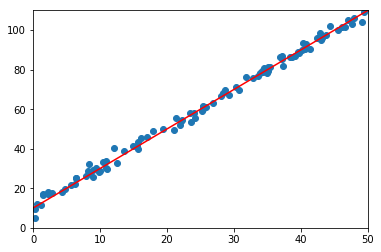

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

def h_lineaire_univarie(theta,x):
    return theta[0]+theta[1]*x
m=100
theta_simule = (10,2)

np.random.seed(22)
X = np.random.rand(m)*50.0 # m valeurs de x entre 0 et 50
Y = h_lineaire_univarie(theta_simule,X)+np.random.randn(m)*2.0
#print("X:",X)
#print("Y:",Y)
plt.axis([0,50,0,110])
plt.scatter(X,Y)

X_modele = np.arange(0,55,10)
Y_modele = h_lineaire_univarie(theta_simule,X_modele)
plt.plot(X_modele, Y_modele, '-r')

plt.show()

X_bar: 22.369083840485704  Y_bar: 56.22795822560963 CovXY: 288.26551455178213 VarX: 147.92710266199583
theta0_estime = 12.637329143504374  theta1_estime =  1.9486997944551836
MSE: 20.942285927900276
MSE: 20.942285927900272


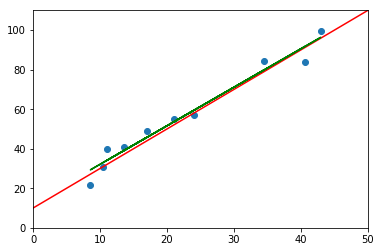

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

def h_lineaire_univarie(theta,x):
    return theta[0]+theta[1]*x
def MSE(Y_estime,Y,m):
    return (((Y_estime-Y)**2).sum())*1/m
def MSE_calcule(Y_estime,Y):
    s = 0.0
    for i in range(len(Y)):
        s+=(Y_estime[i]-Y[i])**2
    return s/len(Y)
        
m=10
theta_simule = (10,2)

np.random.seed(22)
X = np.random.rand(m)*50.0 # m valeurs de x entre 0 et 50
Y = h_lineaire_univarie(theta_simule,X)+np.random.randn(m)*5.0
#print("X:",X)
#print("Y:",Y)
plt.axis([0,50,0,110])
plt.scatter(X,Y)

X_modele = np.arange(0,55,10)
Y_modele = h_lineaire_univarie(theta_simule,X_modele)
plt.plot(X_modele, Y_modele, '-r')

X_bar = X.sum()/m
Y_bar = Y.sum()/m
CovXY = (((X-X_bar)*(Y-Y_bar)).sum())/m
VarX = (((X-X_bar)**2).sum())/m
print("X_bar:",X_bar," Y_bar:",Y_bar,"CovXY:",CovXY,"VarX:",VarX)
theta1_estime = CovXY/VarX
theta0_estime = Y_bar-theta1_estime*X_bar
print("theta0_estime =",theta0_estime," theta1_estime = ",theta1_estime)

Y_estime = theta0_estime + theta1_estime*X
plt.plot(X, Y_estime, '-g')

print("MSE:", MSE(Y_estime,Y,m))
print("MSE:", MSE_calcule(Y_estime,Y))

plt.show()


X: [10.42302687 24.08405309 21.02690177 42.95909993  8.55807768 16.94319803
 13.52664166 34.55206752 11.02022583 40.59754603]
Y: [30.99032933 57.01427024 54.9925646  99.67978775 21.82364259 49.16625813
 40.79203466 84.42751799 39.6410996  83.75207737]
Y_estime: [11.42302687 25.08405309 22.02690177 43.95909993  9.55807768 17.94319803
 14.52664166 35.55206752 12.02022583 41.59754603]
MSE: 1233.786934299261 1233.786934299261
del: -65.71774877024785 -1750.722655829223
theta: (1.3285887438512392, 9.753613279146116)
X: [10.42302687 24.08405309 21.02690177 42.95909993  8.55807768 16.94319803
 13.52664166 34.55206752 11.02022583 40.59754603]
Y: [30.99032933 57.01427024 54.9925646  99.67978775 21.82364259 49.16625813
 40.79203466 84.42751799 39.6410996  83.75207737]
Y_estime: [102.99076201 236.23512876 206.41685703 420.33503624  84.80076885
 166.58599004 133.26222051 338.33609335 108.81560976 397.30135277]
MSE: 35692.535590838874 35692.535590838874
del: 326.5600474142715 9613.965556198567
theta

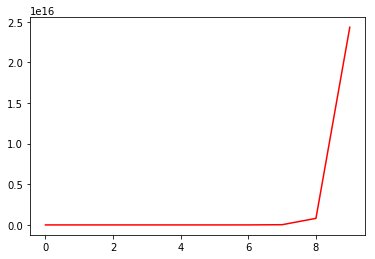

In [3]:
#X=np.array([0.0,1.0])
#Y=np.array([0.0,1.0])
#m=2
theta_actuel = (1.0,1.0)
nb_iterations = 10
vitesse_apprentissage = 0.005
liste_erreurs=[]
for i in range(nb_iterations) :
    Y_estime = h_lineaire_univarie(theta_actuel,X)
    diffymoinsh =-2*(Y-Y_estime)
    print("X:",X)
    print("Y:",Y)
    print("Y_estime:",Y_estime)
    #print("erreur:",MSE(Y_estime,Y,m))
    MSE_actuel = MSE(Y_estime,Y,m)
    print("MSE:",MSE_actuel,MSE_calcule(Y_estime,Y))
    liste_erreurs.append(MSE_actuel)
    delta_theta0 = (diffymoinsh.sum())/m
    delta_theta1 = ((diffymoinsh*X).sum())/m
    print("del:",delta_theta0,delta_theta1)
    thetatemp = theta_actuel
    theta_actuel = (thetatemp[0]-vitesse_apprentissage*delta_theta0,thetatemp[1]-vitesse_apprentissage*delta_theta1)
    print("theta:",theta_actuel)
print("thetafinal:",theta_actuel)
plt.plot(liste_erreurs,"-r")
plt.show()